In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
with open('count_goal_weighted.pkl', 'rb') as file:
    weighted = pickle.load(file)
df_weighted = pd.DataFrame(weighted)

FileNotFoundError: [Errno 2] No such file or directory: 'count_goal_weighted.pkl'

In [3]:
with open('count_goal_nonweighted.pkl', 'rb') as file:
    unweighted = pickle.load(file)
df_unweighted = pd.DataFrame(unweighted)
df_unweighted

,location count,coverage achieved
0,1,0.360402
1,2,0.529030
2,3,0.650915
3,4,0.741832
4,5,0.818927
...,...,...
94,95,0.999998
95,96,0.999999
96,97,0.999999
97,98,1.000000


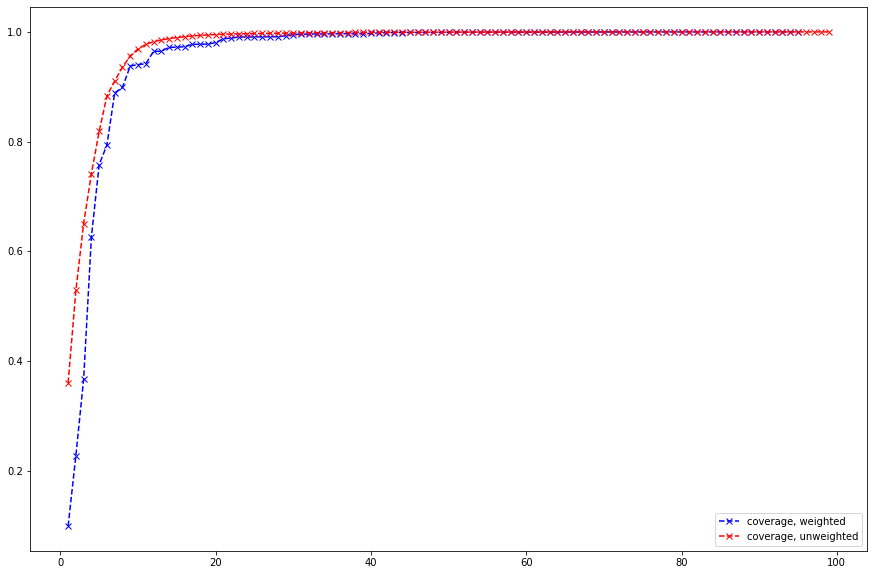

In [4]:
#coverage per point set
#fig3, ax3 = plt.plot()
x_w = df_weighted["location count"]
y_w = df_weighted["coverage achieved"]
x_nw = df_unweighted["location count"]
y_nw = df_unweighted["coverage achieved"]
plt.figure(figsize=(15, 10))
plt.plot(x_w, y_w, linestyle='--', marker='x', color='b', label="coverage, weighted")
plt.plot(x_nw, y_nw, linestyle='--', marker='x', color='r', label="coverage, unweighted")
plt.legend(loc="lower right")
plt.show()

95


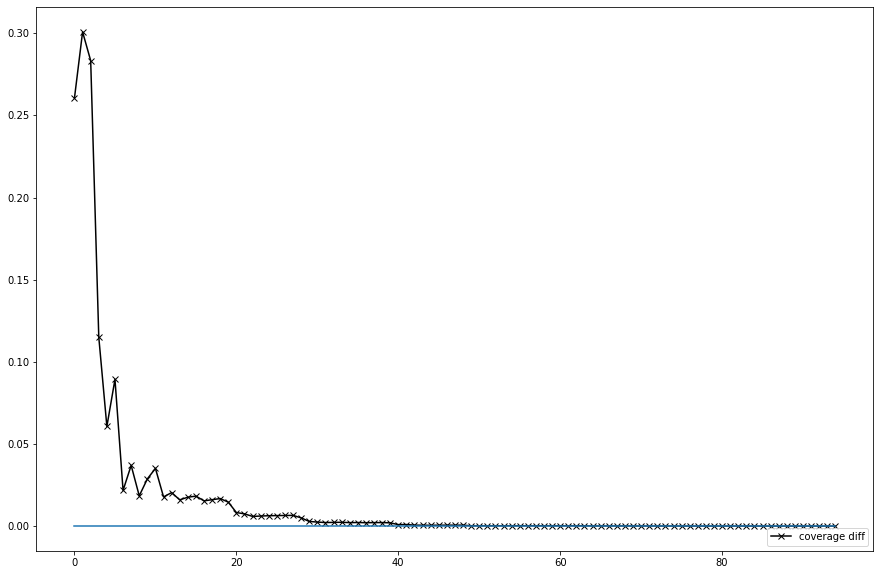

In [5]:
dif = y_nw - y_w
countrel = np.count_nonzero(~np.isnan(np.asarray(dif)))
print(countrel)
x = range(countrel)
plt.figure(figsize=(15, 10))
plt.plot(x, dif[:countrel], marker='x', color='k', label="coverage diff")
plt.plot(x, [0 for _ in x])
plt.legend(loc="lower right")
plt.show()

95


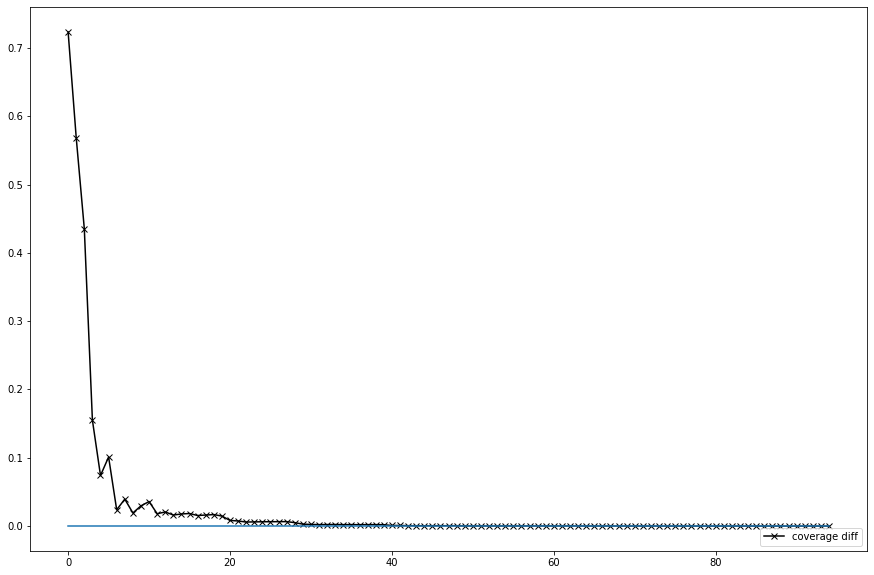

In [6]:
dif = (y_nw - y_w) / y_nw
countrel = np.count_nonzero(~np.isnan(np.asarray(dif)))
print(countrel)
x = range(countrel)
plt.figure(figsize=(15, 10))
plt.plot(x, dif[:countrel], marker='x', color='k', label="coverage diff")
plt.plot(x, [0 for _ in x])
plt.legend(loc="lower right")
plt.show()

In [7]:
df_weighted.iloc[162]

IndexError: single positional indexer is out-of-bounds

In [1]:
# TODO: 1.01 for real full range
coverage_goal = np.arange(0, 1.01, 0.05).tolist()
coverage_goal = [round(num, 2) for num in coverage_goal]
coverage_eval = []
for perc_goal in coverage_goal:
    if perc_goal == 1.0:
        id_weighted =   -1
        id_unweighted = -1
    else:
        id_weighted =   df_weighted  [df_weighted  ['coverage achieved'] >= perc_goal].index[0]
        id_unweighted = df_unweighted[df_unweighted['coverage achieved'] >= perc_goal].index[0]
    coverage_eval.append((perc_goal, df_weighted.iloc[id_weighted], df_unweighted.iloc[id_unweighted]))
coverage_eval

NameError: name 'np' is not defined

In [ ]:
[y[1][1] for y in coverage_eval]

In [ ]:
fig, ax1 = plt.subplots()
fig.set_size_inches(12, 8)
plt.rcParams.update({'font.size': 20})

ax1.set_xlabel('coverage goal')
plt.xticks(rotation=90)
ax1.set_ylabel('achieved coverage')


ax1.set_xticks(coverage_goal)
ax1.grid(axis="x")

ax1.plot([y[0] for y in coverage_eval],
         [y[1][1] for y in coverage_eval],
         linestyle='--', marker='x', markersize=10, color='b', label='coverage, weighted')
ax1.plot([y[0] for y in coverage_eval],
         [y[2][1] for y in coverage_eval],
         linestyle='--', marker='x', markersize=10, color='r', label='coverage, unweighted')
ax1.plot([y[0] for y in coverage_eval],
         [y[0] for y in coverage_eval],         
         linestyle='-', marker='', color='grey', label='coverage goal')
leg = plt.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('no. of points')
#ax2.set_yscale('log')
ax2.plot([y[0] for y in coverage_eval],
         [y[1][0] for y in coverage_eval],
         linestyle=':', marker='+', markersize=10, color='c', label='no. of points, weighted')
ax2.plot([y[0] for y in coverage_eval],
         [y[2][0] for y in coverage_eval],
         linestyle=':', marker='+', markersize=10, color='y', label='no. of points, unweighted')
leg = plt.legend(bbox_to_anchor=(0.89,0.190))

